## Sentiment Trends

### 추준호(20224224)

In [32]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [33]:
query = {
  "size": 0,
  "aggs":{
    "group_by_date": {
      "date_histogram":{
        "field":"created_at",
        "interval":"day"
      },
      "aggs":{
        "group_by_sentiment":{
          "terms":{
            "field":"sentiment.keyword"
          }
        }
      }
    }
  }
}

In [34]:
query = json.dumps(query)

In [35]:
headers = {
    'Content-type': 'application/json'
}

In [36]:
resp = requests.get(
    f'{ELASTICSEARCH_URL}/news/_search',
    headers = headers,
    data = query,
    auth = ELASTICSEARCH_AUTH
)

In [37]:
resp.status_code

200

In [38]:
results = resp.json()

In [39]:
buckets = results['aggregations']['group_by_date']['buckets']

In [40]:
buffer = []
for x in buckets:
    sents = x['group_by_sentiment']['buckets']
    if len(sents) == 0:
        continue
    
    entry = { t['key']: t['doc_count'] for t in sents}
    entry['date'] = x['key_as_string']

    buffer.append(entry)

In [41]:
df_sentiments = pd.DataFrame(buffer)
df_sentiments['date'] = pd.to_datetime(df_sentiments['date'])
df_sentiments = df_sentiments.set_index('date')

In [42]:
df_sentiments.head()

,neutral,positive,negative
date,,,
2022-08-01 00:00:00+00:00,3522,1415,461
2022-08-02 00:00:00+00:00,3163,1311,477
2022-08-03 00:00:00+00:00,3247,1340,435
2022-08-04 00:00:00+00:00,3310,1285,494
2022-08-05 00:00:00+00:00,2438,1026,445


In [43]:
plt.rcParams['figure.figsize'] = (10, 4)

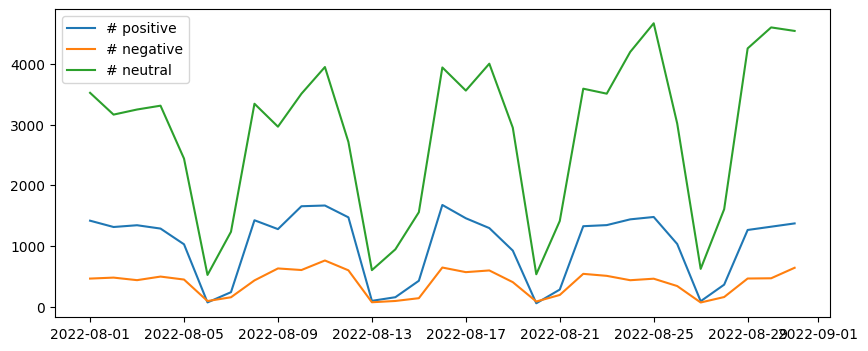

In [44]:
plt.plot(df_sentiments['positive'], label = '# positive')
plt.plot(df_sentiments['negative'], label = '# negative')
plt.plot(df_sentiments['neutral'], label = '# neutral')
plt.legend()
plt.show()

In [45]:
df_sentiments['sentiment'] = (df_sentiments['positive'] - df_sentiments['negative']) / df_sentiments.sum(axis=1)

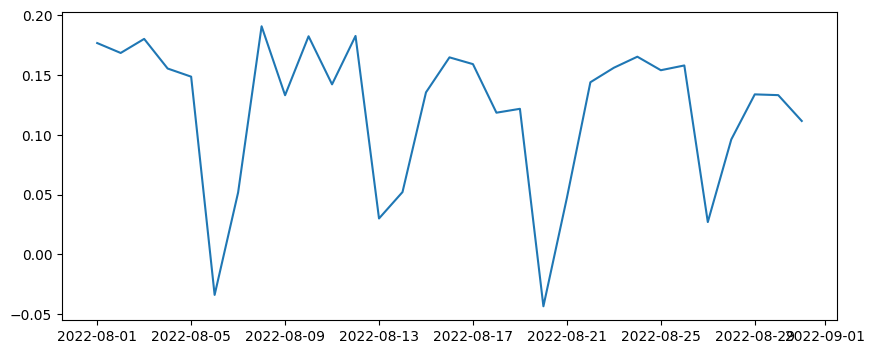

In [46]:
plt.plot(df_sentiments['sentiment'])
plt.show()